In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import talib as ta
from csv import reader

#Leer de un archivo CSV el listado de indices a analizar.
with open('C:/Users/alvar/OneDrive/Escritorio/IndicesSYP500.csv', 'r') as archivo:
     leer = reader(archivo)
     lista2D = list(leer)

lista2D.pop(0) #Elimina primer elemento de la lista
        
#Declaramos tickers
tickers = [] 
for item in lista2D:
     #Añadir elementos a la lista 1D
     tickers += item
# Visulaizar resultados de la lista plana o 1D
#print(tickers)

In [4]:
df_precio=pd.read_csv('precios.csv')
df_volumen=pd.read_csv('volumen.csv')

In [ ]:
df_precio = pd.DataFrame() #Crear dataframe de precio
#Descargamos precios
for i in tickers:
    df_precio[i] = yf.download(i,start='2021-04-01')['Adj Close']

#Extraer precios a un csv
df_precio.to_csv ('precios.csv',index=True)

In [ ]:
df_volumen = pd.DataFrame() #Crear dataframe de volumen
#Descargamos volumenes
for i in tickers:
    df_volumen[i] = yf.download(i,'2021-04-01')['Volume']

#Extraer volumen a un csv
df_volumen.to_csv ('volumen.csv', index=True)

In [6]:
#RETORNOS

#Calculamos los retornos del precio y del volumen
df_precio_return = np.log(df_precio / df_precio.shift(1))
df_volumen_return = np.log(df_volumen / df_volumen.shift(1))

# #Media de los reornos
df_precio_return_md=pd.DataFrame()
df_volumen_return_md=pd.DataFrame()
for i in tickers:
     df_precio_return_md[i] = [df_precio_return[i].mean()]
     df_volumen_return_md[i] = [df_volumen_return[i].mean()]
    
#Aquí calculamos sus retornos acumulados
df_precio_return_acum = df_precio_return.cumsum()
df_volumen_return_acum = df_volumen_return.cumsum()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [13]:
#RSI

#PRECIO

df_precio_rsi_14 = pd.DataFrame()
for i in tickers:
    df_precio_rsi_14[i] = ta.RSI(df_precio_return_acum[i], timeperiod=14)

df_precio_rsi_10 = pd.DataFrame()
for i in tickers:
    df_precio_rsi_10[i] = ta.RSI(df_precio_return_acum[i], timeperiod=10)

df_precio_rsi_7 = pd.DataFrame()
for i in tickers:
    df_precio_rsi_7[i] = ta.RSI(df_precio_return_acum[i], timeperiod=7)

C:\Users\alvar\AppData\Local\Temp\ipykernel_11488\1317342698.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_precio_rsi_14[i] = ta.RSI(df_precio_return_acum[i], timeperiod=14)
C:\Users\alvar\AppData\Local\Temp\ipykernel_11488\1317342698.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_precio_rsi_14[i] = ta.RSI(df_precio_return_acum[i], timeperiod=14)
C:\Users\alvar\AppData\Local\Temp\ipykernel_11488\1317342698.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

In [62]:
#Cálculo de las medias
m7 = pd.DataFrame()
m14 = pd.DataFrame()
m26 = pd.DataFrame()
m50 = pd.DataFrame()
m100 = pd.DataFrame()
m200 = pd.DataFrame()

for i in tickers:
    m7[i]=df_precio[i].rolling(window = 7).mean()
    m14[i]=df_precio[i].rolling(window = 14).mean()
    m26[i]=df_precio[i].rolling(window = 26).mean()
    m50[i]=df_precio[i].rolling(window = 50).mean()
    m100[i]=df_precio[i].rolling(window = 100).mean()
    m200[i]=df_precio[i].rolling(window = 200).mean()

#Cálculo del MACD debo de ajustar las medias para mi temporalidad que será diaria
data_MACD={}
for i in tickers:
    data_MACD[i] = pd.DataFrame()
    data_MACD[i]['macd'], data_MACD[i]['macd_signal'], data_MACD[i]['macd_hist'] = ta.MACD(df_precio[i], fastperiod=12, slowperiod=26, signalperiod=9)
    data_MACD[i]['adj_close']=df_precio[i]

C:\Users\alvar\AppData\Local\Temp\ipykernel_11488\1162635669.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  m7[i]=df_precio[i].rolling(window = 7).mean()
C:\Users\alvar\AppData\Local\Temp\ipykernel_11488\1162635669.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  m14[i]=df_precio[i].rolling(window = 14).mean()
C:\Users\alvar\AppData\Local\Temp\ipykernel_11488\1162635669.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance

GRÁFICAS

In [53]:
#Función para graficar precio y medias
def plot_precio_medias(prices,volumen):

    #plt.figure(figsize=(16,6))
    plt.subplots(figsize=(20,8))
    ax1 = plt.subplot2grid((12,1), (0,0), rowspan = 3, colspan = 1)
    ax2 = plt.subplot2grid((12,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices.index, prices)

    ax1.plot(prices.index,prices.rolling(window = 26).mean())

    ax1.plot(prices.index,prices.rolling(window = 50).mean())

    ax1.plot(prices.index,prices.rolling(window = 100).mean())

    ax1.plot(prices.index,prices.rolling(window = 200).mean())

    ax2.bar(prices.index, volumen, label = "Volumen")

    plt.grid()
    plt.title('Cotizaciones diarias y médias móviles', fontsize = 15)
    plt.legend(['Precio','Media 26 precio','Media 50 precio','Media 100 precio','Media 200 precio'])
    plt.show()

#Función para visulaizar la grafica del RSI
def plot_rsi(prices, rsi):
    plt.subplots(figsize=(20,8))
    ax1 = plt.subplot2grid((12,1), (0,0), rowspan = 3, colspan = 1)
    ax2 = plt.subplot2grid((12,1), (4,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(rsi, color = 'grey', linewidth = 1.5, label = "RSI")
    ax2.axhline(y=75, color = "red", linestyle="--")
    ax2.axhline(y=25, color = "green", linestyle="--")

    plt.legend(loc = "lower right")
    plt.show()

#Para graficar el MACDID creamos esta función

def plot_macd(prices, macd, signal, hist):
    plt.subplots(figsize=(20,8))
    ax1 = plt.subplot2grid((12,1), (0,0), rowspan = 4, colspan = 1)
    ax2 = plt.subplot2grid((12,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = "MACD")
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = "SIGNAL")

    for i in range(len(prices)):
        if str(hist[1])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = "lower right")
    plt.show()

C:\Users\alvar\AppData\Local\Temp\ipykernel_11488\3815566659.py:44: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((12,1), (0,0), rowspan = 4, colspan = 1)


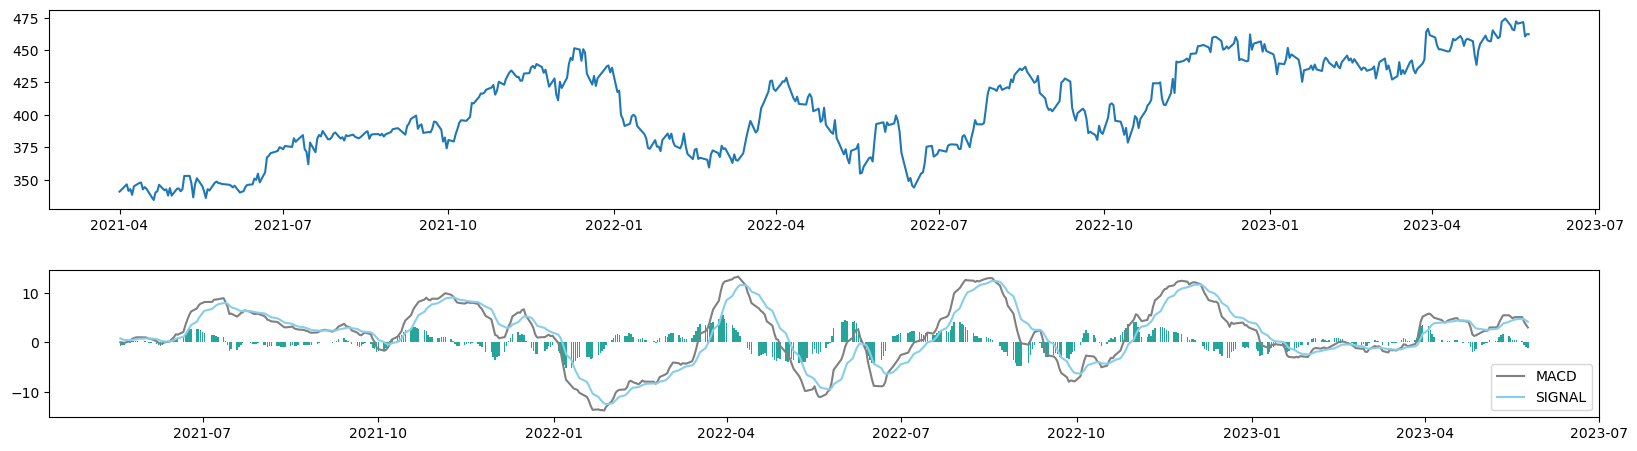

In [112]:
#Con .loc filtro la gráfica a esa fecha, para que solo aparezca graficada a ese tiempo
#plot_rsi(df_precio['MMM'].loc['2023-05'], df_precio_rsi_7['MMM'].loc['2023-05'])
plot_macd(data_MACD['CTAS']['adj_close'], data_MACD['CTAS']['macd'], data_MACD['CTAS']['macd_signal'], data_MACD['CTAS']['macd_hist'])

C:\Users\alvar\AppData\Local\Temp\ipykernel_11488\3815566659.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((12,1), (0,0), rowspan = 3, colspan = 1)


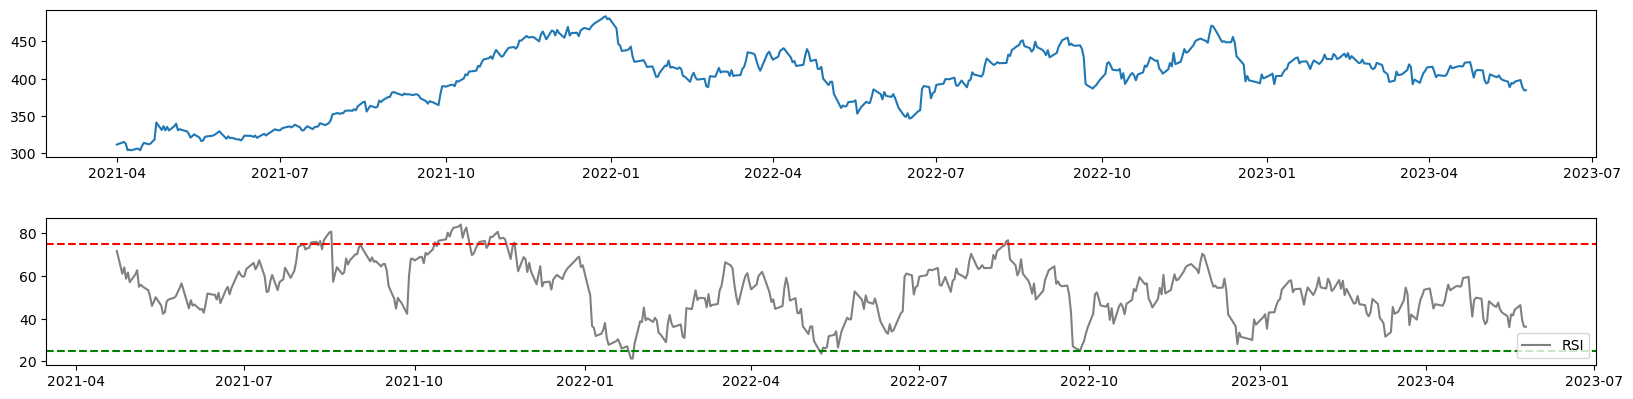

In [115]:
plot_rsi(df_precio['FDS'], df_precio_rsi_14['FDS'])

C:\Users\alvar\AppData\Local\Temp\ipykernel_11488\3815566659.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((12,1), (0,0), rowspan = 3, colspan = 1)


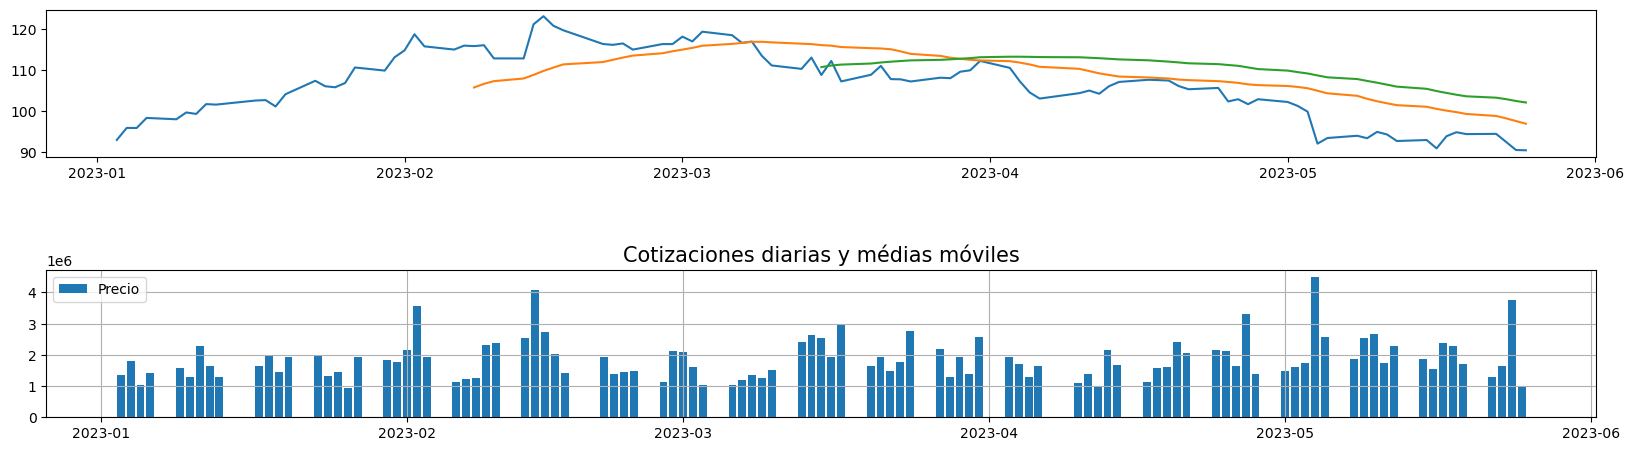

In [121]:
plot_precio_medias(df_precio['APTV'].loc['2023'],df_volumen['APTV'].loc['2023'])

ANÁLISIS

In [15]:
#Sacar activos con RSI en sobre venta
tendencias=[]
for i in tickers:
    if df_precio_rsi_14[i].iloc[-1] < 25 and df_precio_rsi_7[i].iloc[-1] < 25:
        tendencias.append(i)
tendencias

['AEP',
 'AMGN',
 'XRAY',
 'DLTR',
 'D',
 'DUK',
 'EIX',
 'ETR',
 'ES',
 'FMC',
 'PODD',
 'LHX',
 'MKTX']

In [116]:
tendencias2=[]
for i in tickers:
    if abs((df_volumen_return_md[i][0]*2.00)) < abs(df_volumen_return[i].iloc[-1]) and abs((df_precio_return_md[i][0]*0.75)) > abs(df_precio_return[i].iloc[-1]):
        tendencias2.append(i)
tendencias2

['CTAS', 'FDS', 'FTNT']

In [131]:
#Se toman aquellos valores cuya variación de volumen sea el doble de la media del volumen y el precio sea menor que la media de variación del precio(Absorción)
tendencias2=[]
for i in tickers:
    if abs((df_volumen_return_md[i][0])) < abs(df_volumen_return[i].iloc[-1]) and abs((df_precio_return_md[i][0])) > abs(df_precio_return[i].iloc[-1]):
        tendencias2.append(i)
tendencias2

['APTV', 'CTAS', 'FDS', 'FTNT', 'GEN']